所有菜系的PageRank计算完成。
找到可用中文字体: Heiti TC


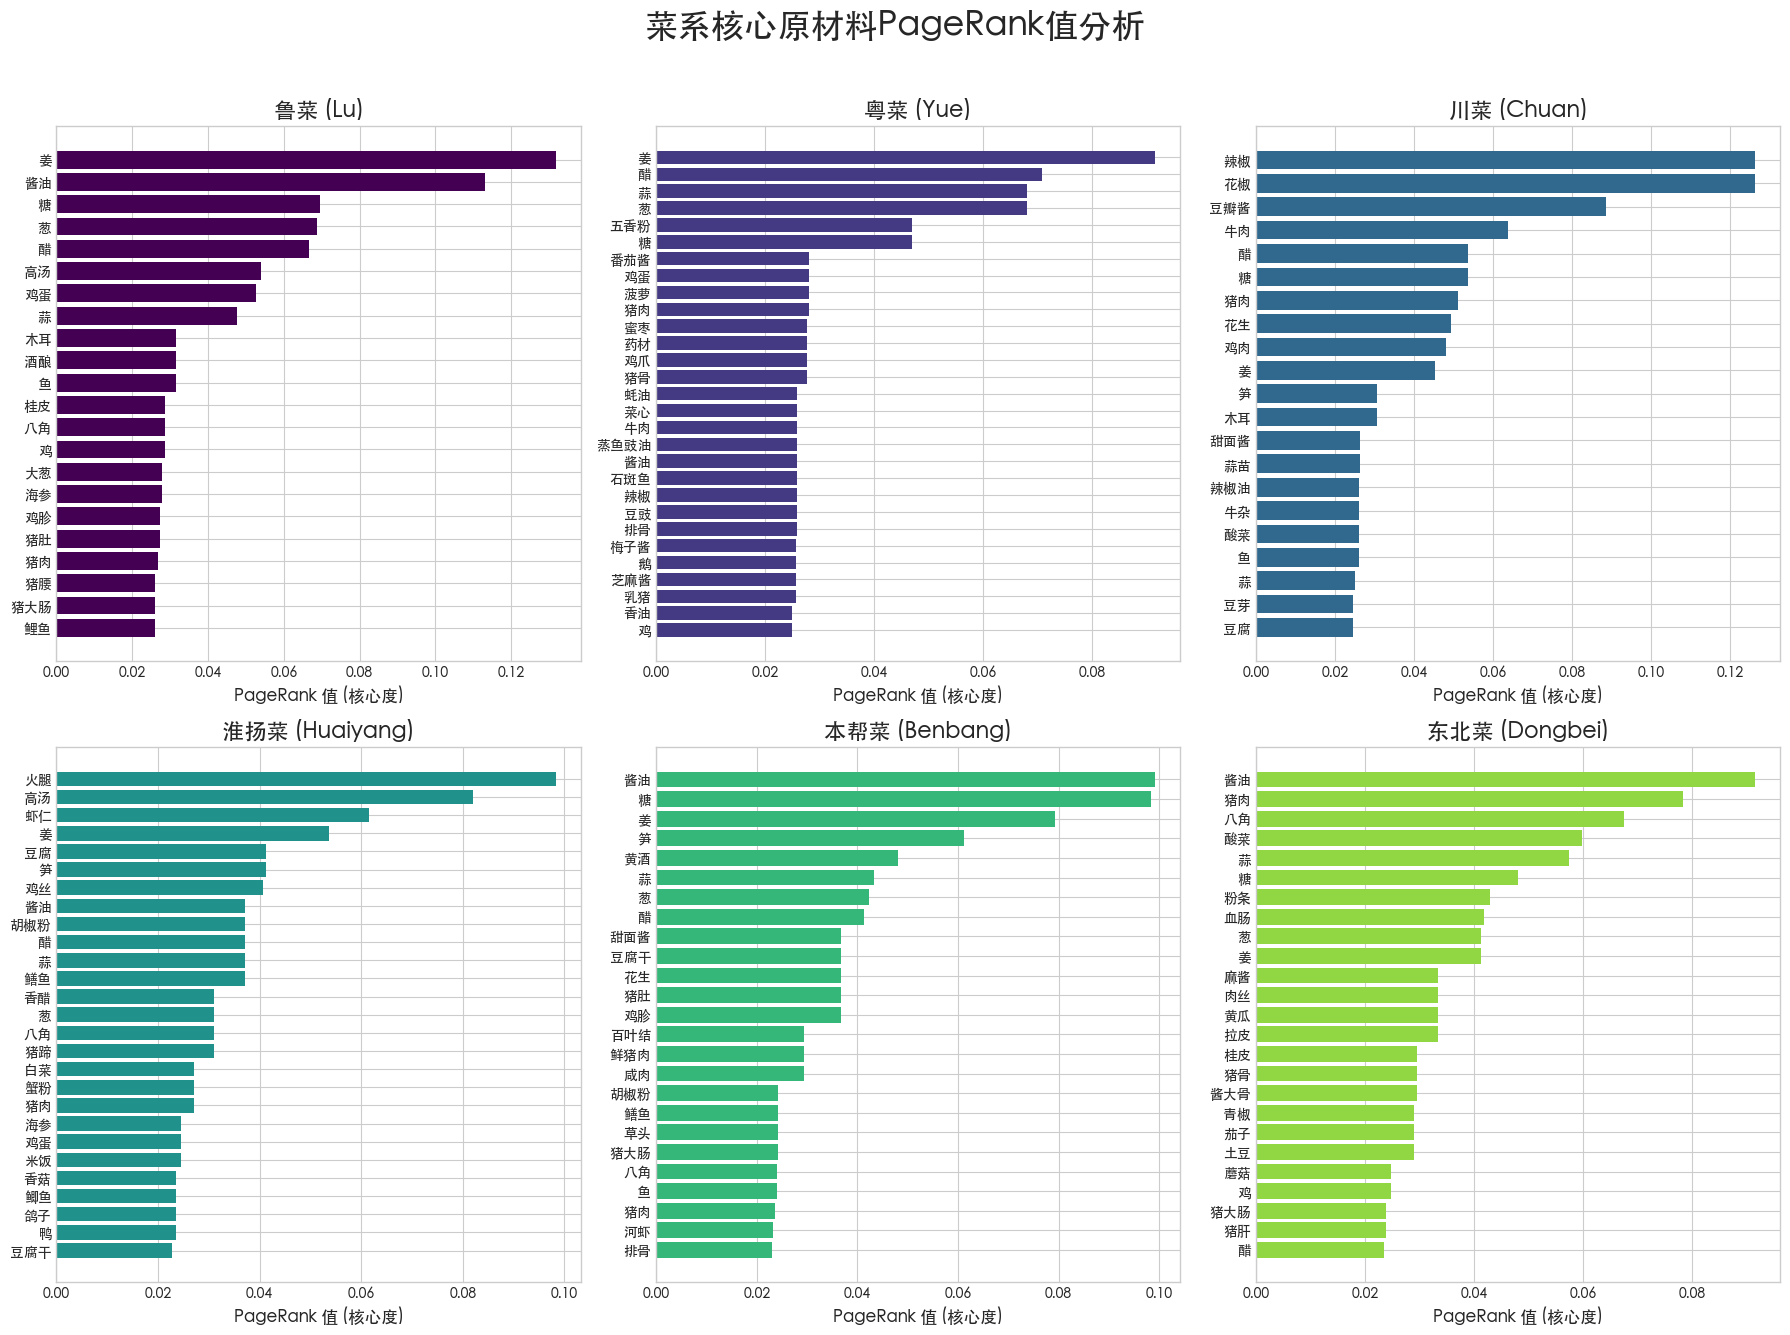


所有独立图表显示完毕。现在开始生成“糖”的PR值地理位置可视化地图...

地图已成功保存为 'sugar_barchart_map_beautified.html'。
请用浏览器打开此文件进行交互式查看。


In [ ]:
# --- 1. 导入所需库 ---
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import matplotlib.font_manager as fm
import folium
import os

# --- 2. 解决中文显示问题的函数 ---
def find_chinese_font():
    """
    查找系统中可用的中文字体。
    """
    font_paths = fm.findSystemFonts()
    for font_path in font_paths:
        try:
            font_name = fm.FontProperties(fname=font_path).get_name()
            if any(s in font_name for s in ['Heiti', 'Song', 'Fang', 'SimHei', 'Microsoft YaHei']):
                print(f"找到可用中文字体: {font_name}")
                return font_name
        except RuntimeError:
            continue
    print("警告: 未找到可用的中文字体，图像中的中文可能显示为方块。")
    return None

# --- 3. 准备数据集 ---
cuisine_data = {
    "鲁菜 (Lu)": [
        ['猪大肠', '糖', '醋', '葱', '姜'], ['海参', '大葱', '酱油', '姜', '高汤'],
        ['鲤鱼', '糖', '醋', '酱油', '姜'], ['猪肚', '鸡胗', '葱', '姜', '蒜'],
        ['鸡', '酱油', '糖', '八角', '桂皮'], ['猪肉', '鸡蛋', '葱', '姜', '酱油'],
        ['猪腰', '蒜', '姜', '醋', '酱油'], ['鱼', '酒酿', '鸡蛋', '木耳', '高汤']
    ],
    "粤菜 (Yue)": [
        ['鸡', '姜', '葱', '蒜', '香油'], ['乳猪', '糖', '醋', '芝麻酱', '五香粉'],
        ['猪骨', '鸡爪', '药材', '蜜枣', '姜'], ['石斑鱼', '姜', '葱', '酱油', '蒸鱼豉油'],
        ['鹅', '梅子酱', '糖', '醋', '五香粉'], ['猪肉', '菠萝', '鸡蛋', '番茄酱', '醋'],
        ['排骨', '豆豉', '蒜', '辣椒', '葱'], ['牛肉', '菜心', '姜', '蒜', '蚝油']
    ],
    "川菜 (Chuan)": [
        ['豆腐', '牛肉', '豆瓣酱', '花椒', '辣椒'], ['猪肉', '蒜苗', '豆瓣酱', '甜面酱', '辣椒'],
        ['鸡肉', '花生', '辣椒', '花椒', '糖', '醋'], ['牛肉', '牛杂', '辣椒油', '花椒', '花生'],
        ['牛肉', '豆芽', '豆瓣酱', '辣椒', '花椒'], ['猪肉', '木耳', '笋', '豆瓣酱', '糖', '醋'],
        ['鱼', '酸菜', '辣椒', '花椒', '姜'], ['鸡肉', '辣椒', '花椒', '蒜', '姜']
    ],
    "淮扬菜 (Huaiyang)": [
        ['猪肉', '蟹粉', '白菜', '高汤', '姜'], ['豆腐干', '鸡丝', '火腿', '虾仁', '高汤'],
        ['鸭', '鸽子', '火腿', '笋', '高汤'], ['鳝鱼', '蒜', '醋', '胡椒粉', '酱油'],
        ['米饭', '鸡蛋', '虾仁', '火腿', '海参'], ['豆腐', '火腿', '鸡丝', '笋', '高汤'],
        ['猪蹄', '八角', '葱', '姜', '香醋'], ['豆腐', '鲫鱼', '虾仁', '香菇', '火腿']
    ],
    "本帮菜 (Benbang)": [
        ['猪肉', '酱油', '糖', '黄酒', '姜'], ['河虾', '糖', '醋', '葱', '姜'],
        ['咸肉', '鲜猪肉', '笋', '百叶结', '黄酒'], ['鳝鱼', '蒜', '姜', '酱油', '胡椒粉'],
        ['排骨', '糖', '醋', '酱油', '姜'], ['猪大肠', '草头', '酱油', '糖', '蒜'],
        ['鸡胗', '猪肚', '花生', '豆腐干', '笋', '甜面酱'], ['鱼', '酱油', '糖', '八角', '葱']
    ],
    "东北菜 (Dongbei)": [
        ['猪肉', '糖', '醋', '姜', '葱'], ['猪肉', '粉条', '酸菜', '酱油', '八角'],
        ['鸡', '蘑菇', '粉条', '酱油', '八角'], ['土豆', '茄子', '青椒', '蒜', '酱油'],
        ['猪肉', '酸菜', '血肠', '姜', '葱'], ['拉皮', '黄瓜', '肉丝', '蒜', '麻酱'],
        ['猪肉', '猪肝', '猪大肠', '酸菜', '血肠'], ['酱大骨', '猪骨', '酱油', '糖', '八角', '桂皮']
    ]
}

# --- 4. 核心计算模块 ---
regional_results = {}
for cuisine, recipes in cuisine_data.items():
    G = nx.Graph()
    for ingredients in recipes:
        for pair in combinations(ingredients, 2):
            if G.has_edge(*pair):
                G[pair[0]][pair[1]]['weight'] += 1
            else:
                G.add_edge(pair[0], pair[1], weight=1)
    pagerank_scores = nx.pagerank(G, weight='weight')
    regional_results[cuisine] = pagerank_scores

print("所有菜系的PageRank计算完成。")

# ==============================================================================
# --- 5. 第一部分可视化：菜系的条形图 ---
# ==============================================================================
# 5.1 设置绘图参数和中文字体
plt.style.use('seaborn-v0_8-whitegrid')
chinese_font = find_chinese_font()
if chinese_font:
    plt.rcParams['font.sans-serif'] = [chinese_font]
plt.rcParams['axes.unicode_minus'] = False

# 5.2 创建一个2x2的子图网格
fig, axes = plt.subplots(2, 3, figsize=(18, 14))
fig.suptitle('菜系核心原材料PageRank值分析', fontsize=24, y=0.95)

# 将2x2的axes数组扁平化，方便循环
axes = axes.flatten()

# 5.3 循环遍历每个菜系的结果，并绘制到对应的子图上
for i, (cuisine, scores) in enumerate(regional_results.items()):
    ax = axes[i]
    
    # 准备数据进行排序和绘图
    sorted_scores = sorted(scores.items(), key=lambda item: item[1])
    ingredients = [item[0] for item in sorted_scores]
    pr_values = [item[1] for item in sorted_scores]
    
    # 在子图上绘制水平条形图
    bars = ax.barh(ingredients, pr_values, color=plt.cm.viridis(i/len(regional_results)))
    
    # 设置子图的标题和标签
    ax.set_title(cuisine, fontsize=16)
    ax.set_xlabel('PageRank 值 (核心度)', fontsize=12)
    ax.tick_params(axis='y', labelsize=10) # 调整y轴标签字体大小

# 5.4 调整整体布局并显示图像
plt.tight_layout(rect=[0, 0, 1, 0.93]) # 调整布局，为总标题留出空间
plt.show()

# ==============================================================================
# --- 6. 第二部分可视化：生成“糖”的PR值美化版地图 ---
# ==============================================================================
print("\n所有独立图表显示完毕。现在开始生成“糖”的PR值地理位置可视化地图...")

# 6.1 提取“糖”的PageRank值
sugar_pr_values = {cuisine: scores.get('糖', 0) for cuisine, scores in regional_results.items()}

# 6.2 准备地理位置和数据
cuisine_locations = {
    "鲁菜 (Lu)": {"location": [36.67, 117.02], "city": "济南"},
    "粤菜 (Yue)": {"location": [23.13, 113.26], "city": "广州"},
    "川菜 (Chuan)": {"location": [30.66, 104.07], "city": "成都"},
    "淮扬菜 (Huaiyang)": {"location": [32.39, 119.42], "city": "扬州"},
    "本帮菜 (Benbang)": {"location": [31.23, 121.47], "city": "上海"},
    "东北菜 (Dongbei)": {"location": [41.80, 123.43], "city": "沈阳"}
}

for cuisine, pr_value in sugar_pr_values.items():
    if cuisine in cuisine_locations:
        cuisine_locations[cuisine]['sugar_pr'] = pr_value

# 6.3 使用 Folium 创建交互式地图
m = folium.Map(location=[35.86, 104.19], zoom_start=5, tiles='CartoDB positron')
max_pr = max(sugar_pr_values.values()) if sugar_pr_values else 0

for cuisine, data in cuisine_locations.items():
    pr_value = data.get('sugar_pr', 0)
    bar_height = (pr_value / max_pr * 100) + 8 if max_pr > 0 else 8
    color = "orangered"
    bar_width = 25
    
    cuisine_cn = cuisine.split(' ')[0]
    
    icon_html = f"""
    <div style="text-align: center; font-family: 'Microsoft YaHei', sans-serif;">
      <div style="width: {bar_width}px; height: {bar_height}px; background-color: {color}; margin: 0 auto; border-radius: 4px; border: 1px solid rgba(0,0,0,0.5);"></div>
      <div style="font-size: 13px; font-weight: bold; color: #333; margin-top: 2px;">{cuisine_cn}</div>
    </div>
    """
    
    icon = folium.DivIcon(html=icon_html, icon_anchor=(bar_width/2, bar_height + 18))
    
    popup_html = f"<b>菜系:</b> {cuisine}<br><b>代表城市:</b> {data['city']}<br><b>“糖”的PR值:</b> {pr_value:.4f}"
    
    folium.Marker(
        location=data['location'],
        icon=icon,
        popup=folium.Popup(popup_html, max_width=300)
    ).add_to(m)

# 6.4 保存地图为HTML文件
map_filename = 'sugar_barchart_map_beautified.html'
m.save(map_filename)

print(f"\n地图已成功保存为 '{map_filename}'。")
print("请用浏览器打开此文件进行交互式查看。")